In [3]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import numpy as np 
from matplotlib import pyplot as plt
stream_data = pd.read_csv('stream.csv')
stream_data.columns = ['time', 'device_id', 'login', 'player', 'country', 'channel', 'game', 'stream', 'subscribers']

#print(stream_data.head(2))
chat_data = pd.read_csv('chat.csv')
chat_data.columns = ['time', 'device_id', 'login', 'player', 'country', 'channel', 'game']
print(chat_data.columns)
print(stream_data.columns)

Index(['time', 'device_id', 'login', 'player', 'country', 'channel', 'game'], dtype='object')
Index(['time', 'device_id', 'login', 'player', 'country', 'channel', 'game',
       'stream', 'subscribers'],
      dtype='object')


In [4]:
engine = create_engine('sqlite://', echo=False)
stream_data.to_sql('streaming', engine, if_exists='replace', index=False)
chat_data.to_sql('chatting', engine, if_exists='replace', index=False, )

In [5]:
#find the unique games in the stream dataset 
results_stream = engine.execute("Select distinct game from streaming")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                                   0
0                  League of Legends
1                               DayZ
2                             Dota 2
3                Heroes of the Storm
4   Counter-Strike: Global Offensive
5    Hearthstone: Heroes of Warcraft
6      The Binding of Isaac: Rebirth
7                            Agar.io
8                  Gaming Talk Shows
9                               None
10                     Rocket League
11                    World of Tanks
12             ARK: Survival Evolved
13                      SpeedRunners
14                    Breaking Point
15                         Duck Game
16  Devil May Cry 4: Special Edition
17                      Block N Load
18                         Fallout 3
19             Batman: Arkham Knight
20                    Reign Of Kings
21          The Witcher 3: Wild Hunt
22       The Elder Scrolls V: Skyrim
23                 Super Mario Bros.
24                              H1Z1
25                    The Last of Us
2

In [6]:
#find the unique channels in the stream dataset 
results_stream = engine.execute("Select distinct channel from streaming")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                0
0        iphone_t
1            site
2           embed
3         android
4          ipad_t
5            home
6       frontpage
7        xbox_one
8          amazon
9            roku
10     chromecast
11        xbox360
12       facebook
13    android_pip
14           ouya
15  nvidia shield


In [7]:
#rank games by popularity
results_stream = engine.execute("Select distinct game, count(*) from streaming group by game order by count(*) desc")
final_stream = pd.DataFrame(results_stream, columns=['game', 'number of players'])
print(final_stream)
stream_games = final_stream['game']
stream_num_players = final_stream['number of players']
lst_stream_games = list(stream_games)
print(lst_stream_games)
lst_stream_num_of_players = list(stream_num_players)
print(lst_stream_num_of_players)

                                game  number of players
0                  League of Legends             193533
1                             Dota 2              85608
2   Counter-Strike: Global Offensive              54438
3                               DayZ              38004
4                Heroes of the Storm              35310
5      The Binding of Isaac: Rebirth              29467
6                  Gaming Talk Shows              28115
7                     World of Tanks              15932
8    Hearthstone: Heroes of Warcraft              14399
9                            Agar.io              11480
10                     Rocket League               7087
11             ARK: Survival Evolved               4158
12                      SpeedRunners               3367
13                              None               3124
14                         Duck Game               1063
15                         Fallout 3                485
16  Devil May Cry 4: Special Edition            

In [8]:
#dinstinguish League of Legends by country and popularity
results_stream = engine.execute("Select distinct game, country, count(*) from streaming where game = 'League of Legends' group by country order by count(*) desc")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                     0     1      2
0    League of Legends    US  85606
1    League of Legends    CA  13034
2    League of Legends    DE  10835
3    League of Legends  None   7641
4    League of Legends    GB   6964
..                 ...   ...    ...
151  League of Legends    GY      1
152  League of Legends    GA      1
153  League of Legends    AZ      1
154  League of Legends    AD      1
155  League of Legends    A1      1

[156 rows x 3 columns]


In [9]:
#dinstinguish League of Legends by country and popularity with slightly different format
results_stream = engine.execute("Select distinct country, count(*) from streaming where game = 'League of Legends' group by country order by count(*) desc")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

        0      1
0      US  85606
1      CA  13034
2      DE  10835
3    None   7641
4      GB   6964
..    ...    ...
151    GY      1
152    GA      1
153    AZ      1
154    AD      1
155    A1      1

[156 rows x 2 columns]


In [10]:
results_chat = engine.execute("SELECT game FROM chatting")
final_chat = pd.DataFrame(results_chat)
print(final_chat)

                                       0
0       Devil May Cry 4: Special Edition
1                      League of Legends
2                      League of Legends
3                                 Dota 2
4                                 Dota 2
...                                  ...
148556                    World of Tanks
148557                    World of Tanks
148558                              DayZ
148559                              DayZ
148560               Heroes of the Storm

[148561 rows x 1 columns]


In [11]:
#The player column contains the source the user is using to view the stream (site, iphone, android, etc). Create a list of players and their number of streamers.
results_stream = engine.execute("Select channel, count(channel) from streaming group by channel order by count(*) desc")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                0       1
0            site  246115
1        iphone_t  100689
2         android   93508
3          ipad_t   53646
4           embed   19819
5        xbox_one    4863
6            home    3479
7       frontpage    1567
8          amazon    1155
9         xbox360     985
10           roku     233
11     chromecast     149
12       facebook      83
13           ouya       3
14  nvidia shield       3
15    android_pip       2


In [12]:
#Create a new column named genre for each of the games. Group the games into their genres: Multiplayer Online Battle Arena (MOBA), First Person Shooter (FPS), Survival, and Other. Using CASE,your logic should be: If League of Legends → MOBA If Dota 2 → MOBA If Heroes of the Storm → MOBA If Counter-Strike: Global Offensive → FPS If DayZ → Survival If ARK: Survival Evolved → Survival Else → Other Use GROUP BY and ORDER BY to showcase only the unique game titles.

#results_stream = engine.execute("Select game, \
    #case \
        #when game = 'League of Legends' \
            #then 'MOBA' \
        #else \
            #then 'Other' \
    #end as genre \
            #from streaming group by game")
#final_stream = pd.DataFrame(results_stream)
#print(final_stream)

In [13]:
# Now moving to visualize the data from our earlier searches
games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]
 
viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]



In [14]:
# Now moving to visualize the data from our earlier searches, we want to get a sense of players per game. First we need to make lists out of our dataframe columns.

stream_games = final_stream['game']
stream_num_players = final_stream['number of players']
lst_stream_games = list(stream_games)
print(lst_stream_games)
lst_stream_num_of_players = list(stream_num_players)
print(lst_stream_num_of_players)

KeyError: 'game'

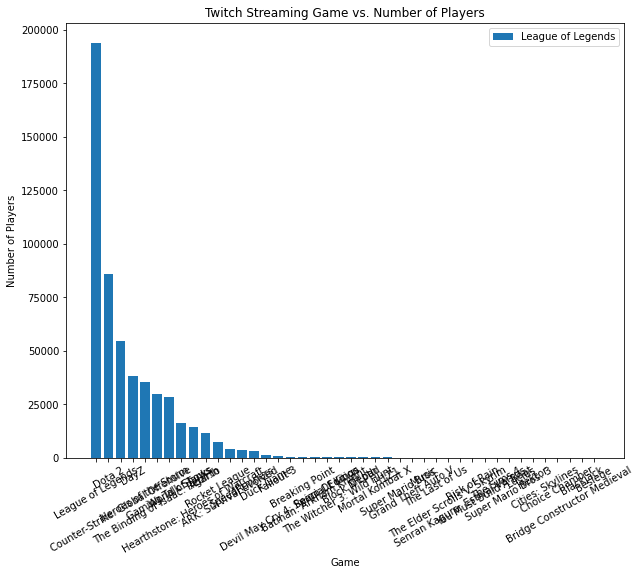

In [83]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(lst_stream_games)), lst_stream_num_of_players)
plt.xlabel('Game')
plt.ylabel('Number of Players')
plt.legend(['League of Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'DayZ'])
plt.title('Twitch Streaming Game vs. Number of Players')
ax.set_xticks(range(len(lst_stream_games)))
ax.set_xticklabels(lst_stream_games, rotation=30)

plt.show()

In [98]:
#In order to get a graph that is easier to read and focuses more on the most used games, I cut the lists down to those with more than 1000 users.
lst_stream_games = list(stream_games)
lst_stream_games_for_new_graph = lst_stream_games[0:15]
print(lst_stream_games_for_new_graph)

lst_stream_num_of_players = list(stream_num_players)
lst_stream_num_of_players_for_new_graph = lst_stream_num_of_players[0:15]
print(lst_stream_num_of_players_for_new_graph)

['League of Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'DayZ', 'Heroes of the Storm', 'The Binding of Isaac: Rebirth', 'Gaming Talk Shows', 'World of Tanks', 'Hearthstone: Heroes of Warcraft', 'Agar.io', 'Rocket League', 'ARK: Survival Evolved', 'SpeedRunners', None, 'Duck Game']
[193533, 85608, 54438, 38004, 35310, 29467, 28115, 15932, 14399, 11480, 7087, 4158, 3367, 3124, 1063]


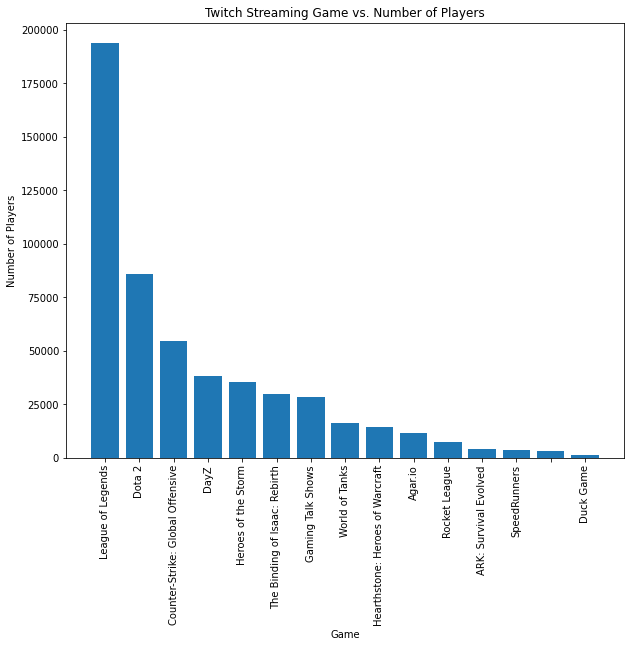

In [104]:
#This is the visualization of the focused data
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(lst_stream_games_for_new_graph)), lst_stream_num_of_players_for_new_graph)
plt.xlabel('Game')
plt.ylabel('Number of Players')
plt.title('Twitch Streaming Game vs. Number of Players')
ax.set_xticks(range(len(lst_stream_games_for_new_graph)))
ax.set_xticklabels(lst_stream_games_for_new_graph, rotation=90)

plt.show()

In [111]:
#Now we want to understand the breakdown of all League of Legends players. We will use a piechart to get a sense for how distinct parts relate to a known whole.
final_stream_lol_countries = final_stream[0]
lst_final_stream_lol_countries = list(final_stream_lol_countries)

print(lst_final_stream_lol_countries)

final_stream_lol_countries_numbers = final_stream[1]
lst_final_stream_lol_countries_numbers = list(final_stream_lol_countries_numbers)

print(lst_final_stream_lol_countries_numbers)

['US', 'CA', 'DE', None, 'GB', 'TR', 'AU', 'SE', 'NL', 'DK', 'GR', 'PL', 'PT', 'RO', 'IT', 'FR', 'TW', 'BR', 'MX', 'NO', 'BE', 'ES', 'FI', 'CZ', 'NZ', 'RU', 'HU', 'AT', 'LT', 'BG', 'HK', 'HR', 'CL', 'RS', 'IL', 'CH', 'JP', 'SG', 'AR', 'MA', 'IE', 'CO', 'SK', 'SI', 'SA', 'AE', 'BA', 'PH', 'KW', 'PR', 'EE', 'LV', 'MY', 'CR', 'UA', 'TN', 'VE', 'KR', 'CY', 'EG', 'VN', 'AL', 'PE', 'MK', 'TT', 'ZA', 'DO', 'BB', 'MT', 'JM', 'IN', 'QA', 'JO', 'IS', 'UY', 'PA', 'GE', 'NI', 'CN', 'LU', 'MO', 'BS', 'LB', 'ME', 'IQ', 'BH', 'GT', 'TH', 'PK', 'DZ', 'BY', 'ID', 'CW', 'KZ', 'EC', 'MD', 'SV', 'HN', 'OM', 'AW', 'RE', 'PY', 'IR', 'FO', 'GU', 'JE', 'BD', 'BZ', 'MN', 'KE', 'AM', 'BO', 'PS', 'MU', 'LI', 'PF', 'NG', 'EU', 'BN', 'IM', 'GP', 'VI', 'FJ', 'LK', 'LC', 'KY', 'GF', 'BQ', 'AX', 'SD', 'LY', 'KH', 'GI', 'GG', 'DM', 'AI', 'VC', 'SR', 'KG', 'AG', 'VG', 'TC', 'MC', 'KN', 'GL', 'BM', 'SN', 'SM', 'SC', 'NC', 'MQ', 'GY', 'GA', 'AZ', 'AD', 'A1']
[85606, 13034, 10835, 7641, 6964, 4412, 3911, 3533, 3213, 2909,

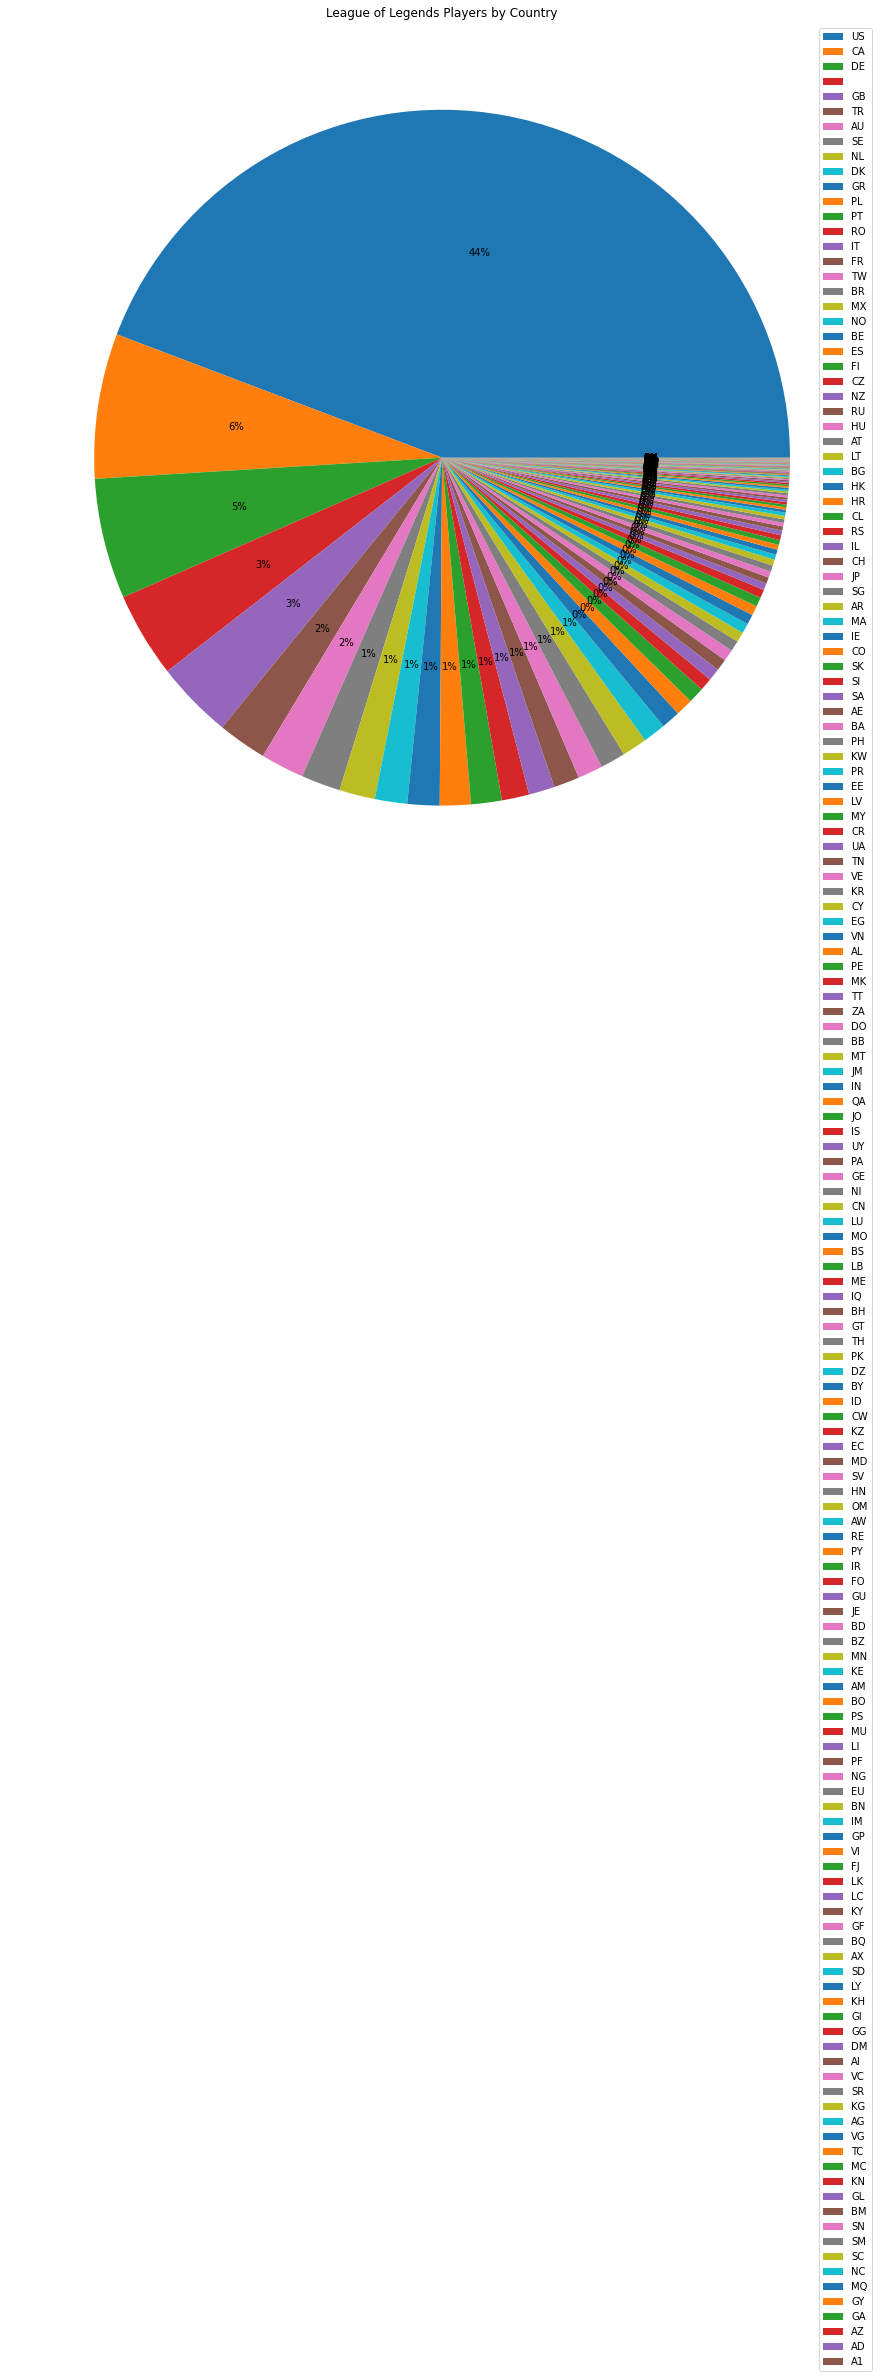

In [118]:
plt.figure(figsize=(20,16))
plt.pie(lst_final_stream_lol_countries_numbers, autopct='%d%%')
plt.legend(lst_final_stream_lol_countries)
plt.title('League of Legends Players by Country')
plt.show()

In [2]:
#Now we want to focus on the most popular areas
lst_final_stream_lol_countries_cut = lst_final_stream_lol_countries[0:27]
lst_final_stream_lol_countries_numbers_cut = lst_final_stream_lol_countries_numbers[0:27]

plt.figure(figsize=(20,16))
explode = (.1, .1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(lst_final_stream_lol_countries_numbers_cut, autopct='%d%%', explode=explode, shadow=True)

plt.title('League of Legends Players by Country')
plt.legend(lst_final_stream_lol_countries_cut, loc="right")


plt.show()

NameError: name 'lst_final_stream_lol_countries' is not defined

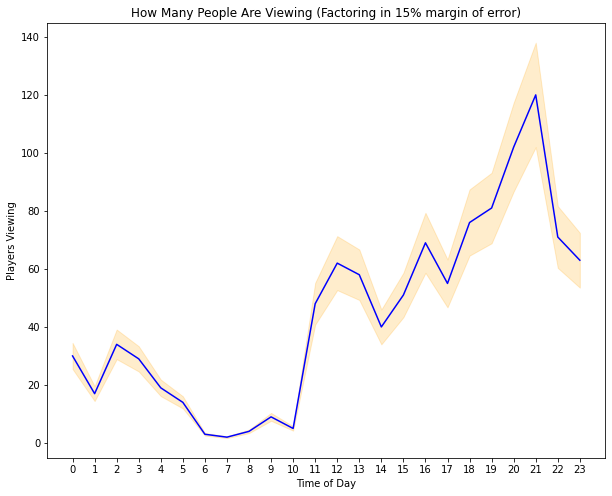

In [149]:
#Finally, a line graph by hour in the US

hour = range(24)
 
viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(hour, viewers_hour, color='blue')
plt.xlabel('Time of Day')
plt.ylabel('Players Viewing')
plt.title('How Many People Are Viewing (Factoring in 15% margin of error)')
y_upper = [1.15 * t for t in viewers_hour]
y_lower = [.85 * t for t in viewers_hour]
plt.fill_between(hour, y_upper, y_lower, alpha=.2, color='orange')
ax.set_xticks(hour)
ax.set_xticklabels(hour)
plt.show()
